<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220914_fashion_mnist_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

#!pip freeze
#!pip list

In [4]:
import os, sys
env_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/env1', env_path)
sys.path.insert(0, env_path)

#import selenium

In [5]:
# 패션 MNIST 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 출력을 위해, 클래스 이름 선언
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# 데이터 전처리
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
# 모델 설계
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  #Dense layer -> FC : Fully Connected, 입력 수 상관 없이 노드 수 = 출력 수
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# keras.layers.Flatten : 2차원 이미지 정보를 1차원 배열 변환
# keras.layers.Dense : densely-connected/fully-connected 노드(뉴런)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,962
Trainable params: 125,962
Non-trai

In [8]:
# 훈련 설정
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7917 - accuracy: 0.7261
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4823 - accuracy: 0.8296
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4279 - accuracy: 0.8464
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8590
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8651
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3567 - accuracy: 0.8704
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8747
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3297 - accuracy: 0.8795
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3203 - accuracy: 0.8836
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.311

#### 1. 얕은 은닉층의 모델 만들기(model_1)

In [10]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7567 - accuracy: 0.7547
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5167 - accuracy: 0.8267
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4704 - accuracy: 0.8375
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4462 - accuracy: 0.8461
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4282 - accuracy: 0.8518
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8558
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4013 - accuracy: 0.8610
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3922 - accuracy: 0.8632
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8672
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.375

#### 2. 보다 깊은 은닉층의 모델 만들기(model_2)

In [11]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8704 - accuracy: 0.3014
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7680 - accuracy: 0.6989
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5403 - accuracy: 0.8014
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4685 - accuracy: 0.8337
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4223 - accuracy: 0.8518
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3905 - accuracy: 0.8630
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8673
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3528 - accuracy: 0.8748
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3407 - accuracy: 0.8783
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.327

#### 3. Functional API 모델 만들기(model_3)


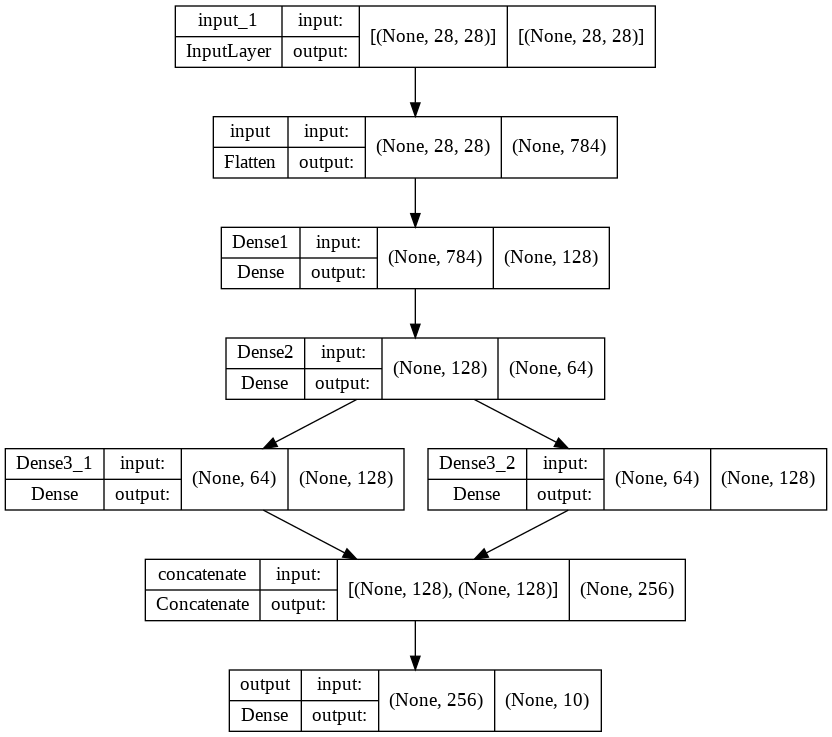

In [12]:
_input = keras.Input(shape=(28, 28))
Dense = keras.layers.Flatten(input_shape=(28, 28), name = "input")(_input)
Dense_1 = keras.layers.Dense(128, activation="relu", name = "Dense1")(Dense)
Dense_2 = keras.layers.Dense(64, activation='relu', name="Dense2")(Dense_1)
Dense_3_1 = keras.layers.Dense(128, activation='relu', name="Dense3_1")(Dense_2)
Dense_3_2 = keras.layers.Dense(128, activation='relu', name="Dense3_2")(Dense_2)
Dense_3 = keras.layers.Concatenate(axis=1)([Dense_3_1, Dense_3_2])
Dense_4 = keras.layers.Dense(10, activation='softmax', name="output")(Dense_3)
model_3 = keras.Model(inputs=_input, outputs=Dense_4, name="model3")

keras.utils.plot_model(model_3, "model3.png", show_shapes=True)

In [13]:
model_3.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1846 - accuracy: 0.6290
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6389 - accuracy: 0.7687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5414 - accuracy: 0.8076
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8265
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4597 - accuracy: 0.8353
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4391 - accuracy: 0.8436
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4232 - accuracy: 0.8489
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8534
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4004 - accuracy: 0.8575
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.391

#### 예측정확도 확인

In [14]:
loss_1, acc_1 = model_1.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.8523


In [15]:
loss_2, acc_2 = model_2.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3956 - accuracy: 0.8574 - 848ms/epoch - 3ms/step


In [16]:
loss_3, acc_3 = model_3.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4216 - accuracy: 0.8486 - 650ms/epoch - 2ms/step


In [76]:
# 각 클래스에 대한 예측을 표시하기 위한 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.xlabel("{}".format(class_names[true_label]))

  plt.imshow(img, cmap=plt.cm.binary)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)

In [21]:
predictions = [model_1.predict(test_images), model_2.predict(test_images), model_3.predict(test_images)]

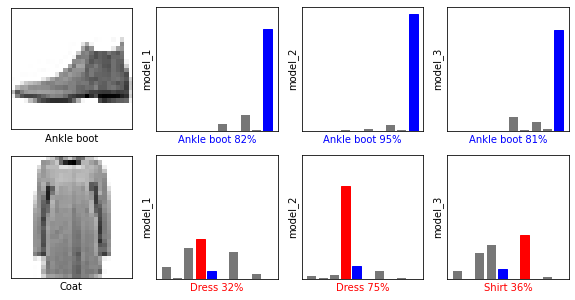

In [77]:
plt.figure(figsize=(10, 5))
_index = [0, 150]
for i in range(len(_index)):
  ax1 = plt.subplot(2, 4, 4*i+1)
  plot_image(_index[i], predictions[0], test_labels, test_images)
  for j in range(3):
    ax2 = plt.subplot(2, 4, 4*i+j+2)    
    plot_value_array(_index[i], predictions[j],  test_labels)
    ax2.set_ylabel("model_{}".format(j+1))
plt.show()